### Import Libraries

In [22]:
import sys
sys.path.append("../models")
sys.path.append("../")

In [23]:
import models.fm4m as fm4m
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

## FM4M Architecture
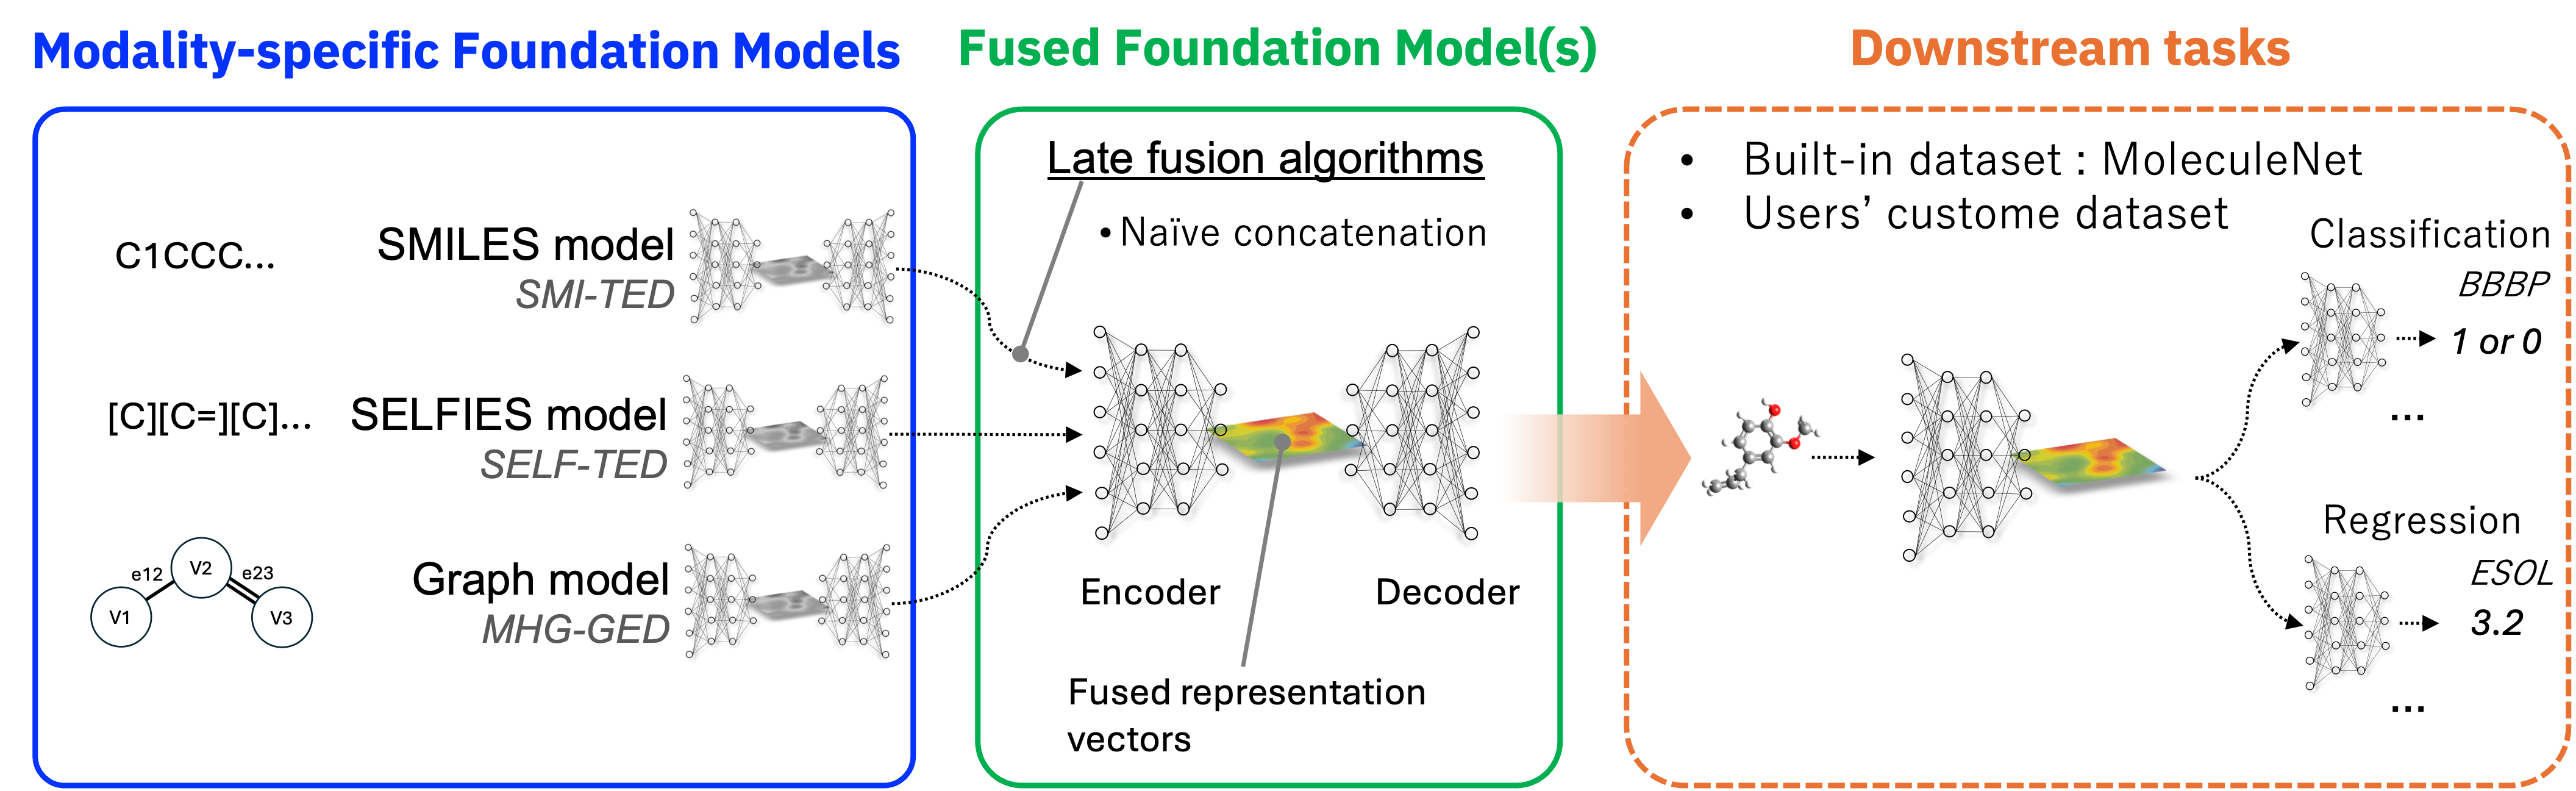

## Workflow
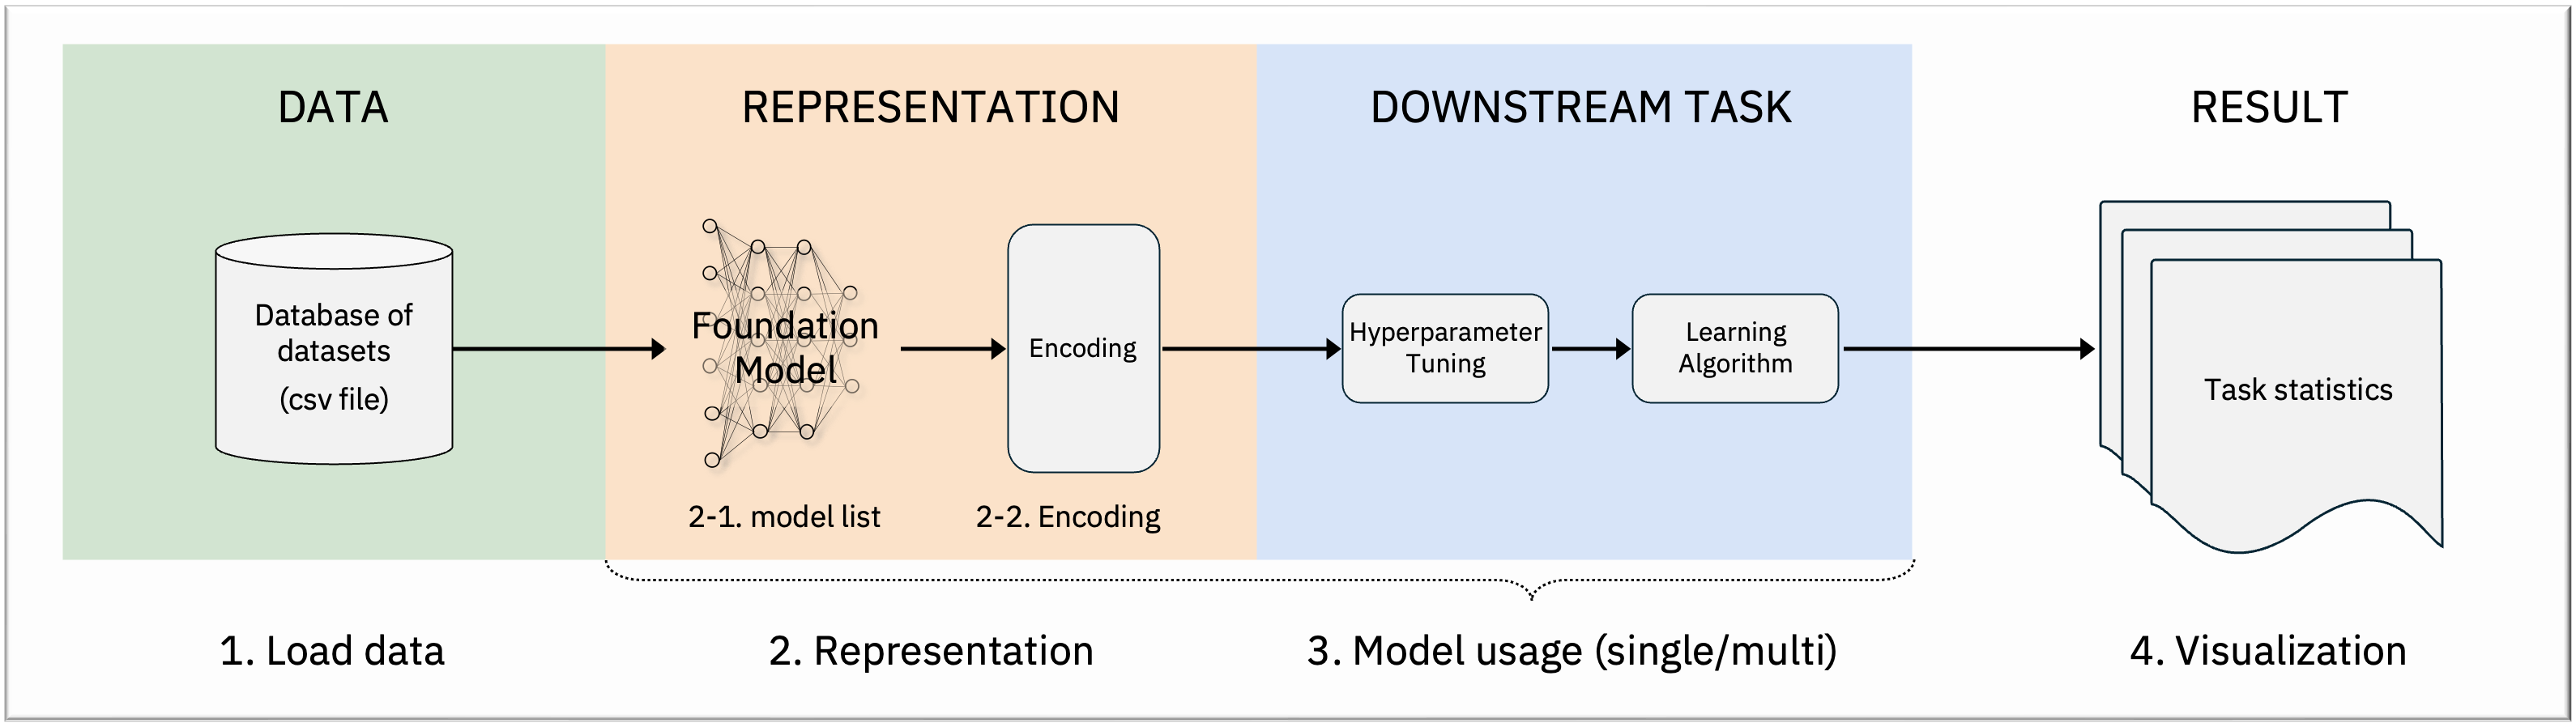

## 1. Load Data


In [25]:
train_df  = pd.read_csv(f"../data/bace/train.csv")
test_df  = pd.read_csv(f"../data/bace/test.csv")

In [26]:
print(f"shape of train_df: {train_df.shape}")
train_df.head(3)

shape of train_df: (1209, 595)


,smiles,CID,Class,Unnamed: 3,pIC50,MW,AlogP,HBA,HBD,RB,...,PEOE6 (PEOE6),PEOE7 (PEOE7),PEOE8 (PEOE8),PEOE9 (PEOE9),PEOE10 (PEOE10),PEOE11 (PEOE11),PEOE12 (PEOE12),PEOE13 (PEOE13),PEOE14 (PEOE14),canvasUID
0,O1CC[C@@H](NC(=O)[C@@H](Cc2cc3cc(ccc3nc2N)-c2c...,BACE_1,1,NaN,9.154901,431.56979,4.4014,3,2,5,...,53.205711,78.640335,226.85541,107.43491,37.133846,0.000000,7.98017,0.0,0.000000,1
1,S1(=O)(=O)N(c2cc(cc3c2n(cc3CC)CC1)C(=O)N[C@H](...,BACE_3,1,NaN,8.698970,591.74091,2.5499,4,3,11,...,70.365707,47.941147,192.40652,255.75255,23.654478,0.230159,15.87979,0.0,24.663788,3
2,S1(=O)(=O)N(c2cc(cc3c2n(cc3CC)CC1)C(=O)N[C@H](...,BACE_5,1,NaN,8.698970,629.71283,3.5086,3,3,11,...,78.945702,39.361153,179.71288,220.46130,23.654478,0.230159,15.87979,0.0,26.100143,5


In [27]:
input = "smiles"
output = "Class"

xtrain = list(train_df[input].values)
ytrain = list(train_df[output].values)

xtest = list(test_df[input].values)
ytest = list(test_df[output].values)

## 2. Representation
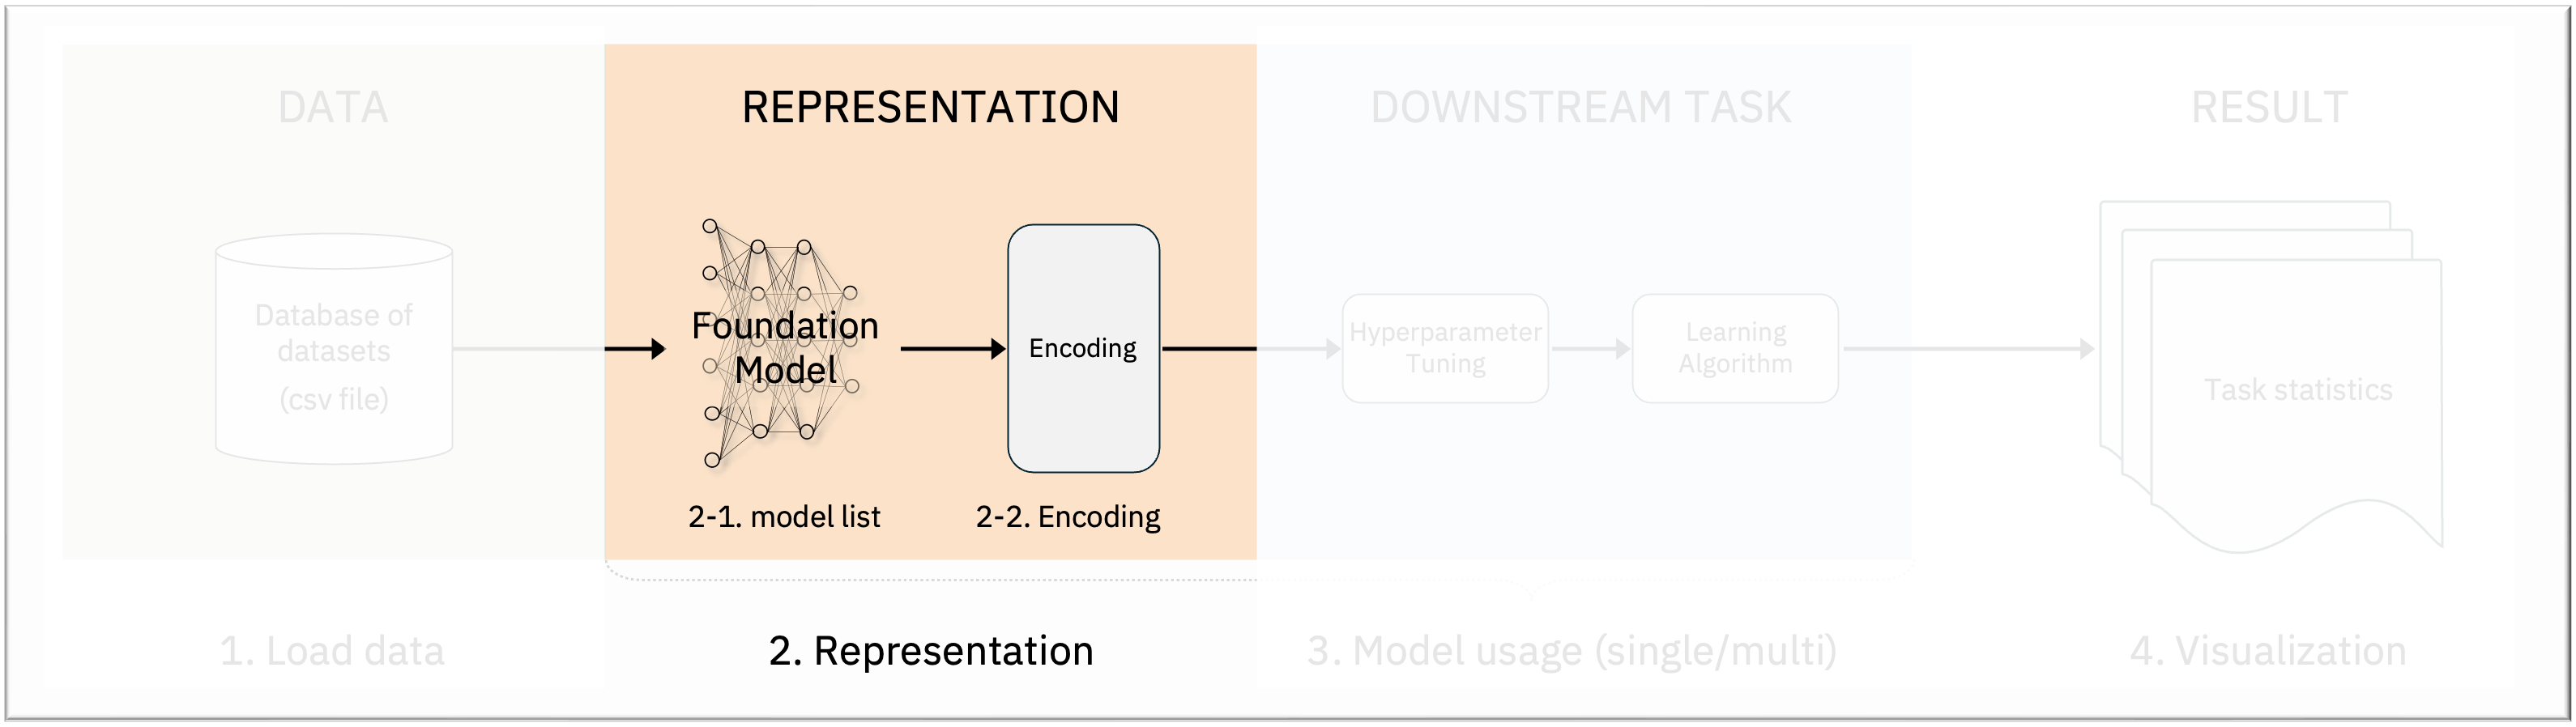

In [9]:
fm4m.avail_models()

,Model Name,Description
0,SMI-TED,SMILES based encoder decoder model
1,SELFIES-TED,BART model for string based SELFIES modality
2,MolFormer,MolFormer model for string based SMILES modality
3,MHG-GED,Molecular hypergraph model
4,Mordred,Baseline: A descriptor-calculation software ap...
5,MorganFingerprint,Baseline: Circular atom environments based des...


### 2-2. Encoding

In [29]:
x_batch, x_batch_test = fm4m.get_representation(xtrain, xtest, model_type = 'MHG-GED', return_tensor = False)

/content/materials/models/mhg_model/load.py:84: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_dict = torch.load(f)


In [ ]:
print(f"x_batch shape: {x_batch.shape}, x_batch_test shape: {x_batch_test.shape}")
x_batch

x_batch shape: (1209, 768), x_batch_test shape: (152, 768)


,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
0,0.432795,-0.476149,0.072669,0.375831,0.562575,-0.671044,1.190857,-0.020975,0.764821,0.079141,...,-1.326007,-0.088915,0.201857,0.324510,-0.720209,0.653081,-0.704384,0.696758,0.611302,-0.063952
1,0.528735,-0.555245,0.033619,0.387347,0.546746,-0.710245,1.128976,-0.013371,0.736328,0.066741,...,-1.192906,-0.169000,0.122943,0.247952,-0.679658,0.737677,-0.956963,0.714781,0.483514,-0.060268
2,0.475825,-0.572421,0.100784,0.361870,0.588710,-0.708049,1.118276,-0.009578,0.734356,0.074469,...,-1.165266,-0.144192,0.125706,0.283823,-0.672095,0.721816,-0.952328,0.691085,0.470331,-0.073450
3,0.478042,-0.512887,0.091044,0.353824,0.394042,-0.641402,1.054891,-0.032980,0.736365,0.108891,...,-1.363041,-0.153934,0.132025,0.274818,-0.650403,0.532533,-0.796147,0.705140,0.489337,-0.030475
4,0.574372,-0.491080,0.066919,0.354124,0.570369,-0.671606,1.133023,0.033610,0.749695,0.079589,...,-1.372101,-0.227014,0.076281,0.225838,-0.641757,0.647436,-0.727127,0.743709,0.512341,-0.002017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1204,0.354983,-0.545401,0.063289,0.353194,0.494594,-0.633396,1.181199,0.032544,0.807037,0.202889,...,-1.210480,-0.149242,0.096754,0.176923,-0.745009,0.600032,-0.776227,0.923280,0.598623,-0.240793
1205,0.402570,-0.450042,0.041163,0.380645,0.535231,-0.670026,1.125877,0.066359,0.787232,0.190301,...,-1.371521,-0.142455,0.130240,0.293620,-0.615826,0.642996,-0.731161,0.801726,0.602175,-0.165733
1206,0.425378,-0.457120,0.041755,0.375860,0.558742,-0.662383,1.136322,0.029413,0.785662,0.197146,...,-1.390499,-0.176545,0.127185,0.287115,-0.620474,0.649422,-0.789870,0.797363,0.595204,-0.181519
1207,0.370404,-0.513122,0.041266,0.422496,0.692668,-0.637412,1.137354,0.076057,0.657864,0.165203,...,-1.348263,-0.179334,0.066102,0.311834,-0.743284,0.592168,-0.709541,0.796678,0.604081,-0.134681


## 3. Model usage
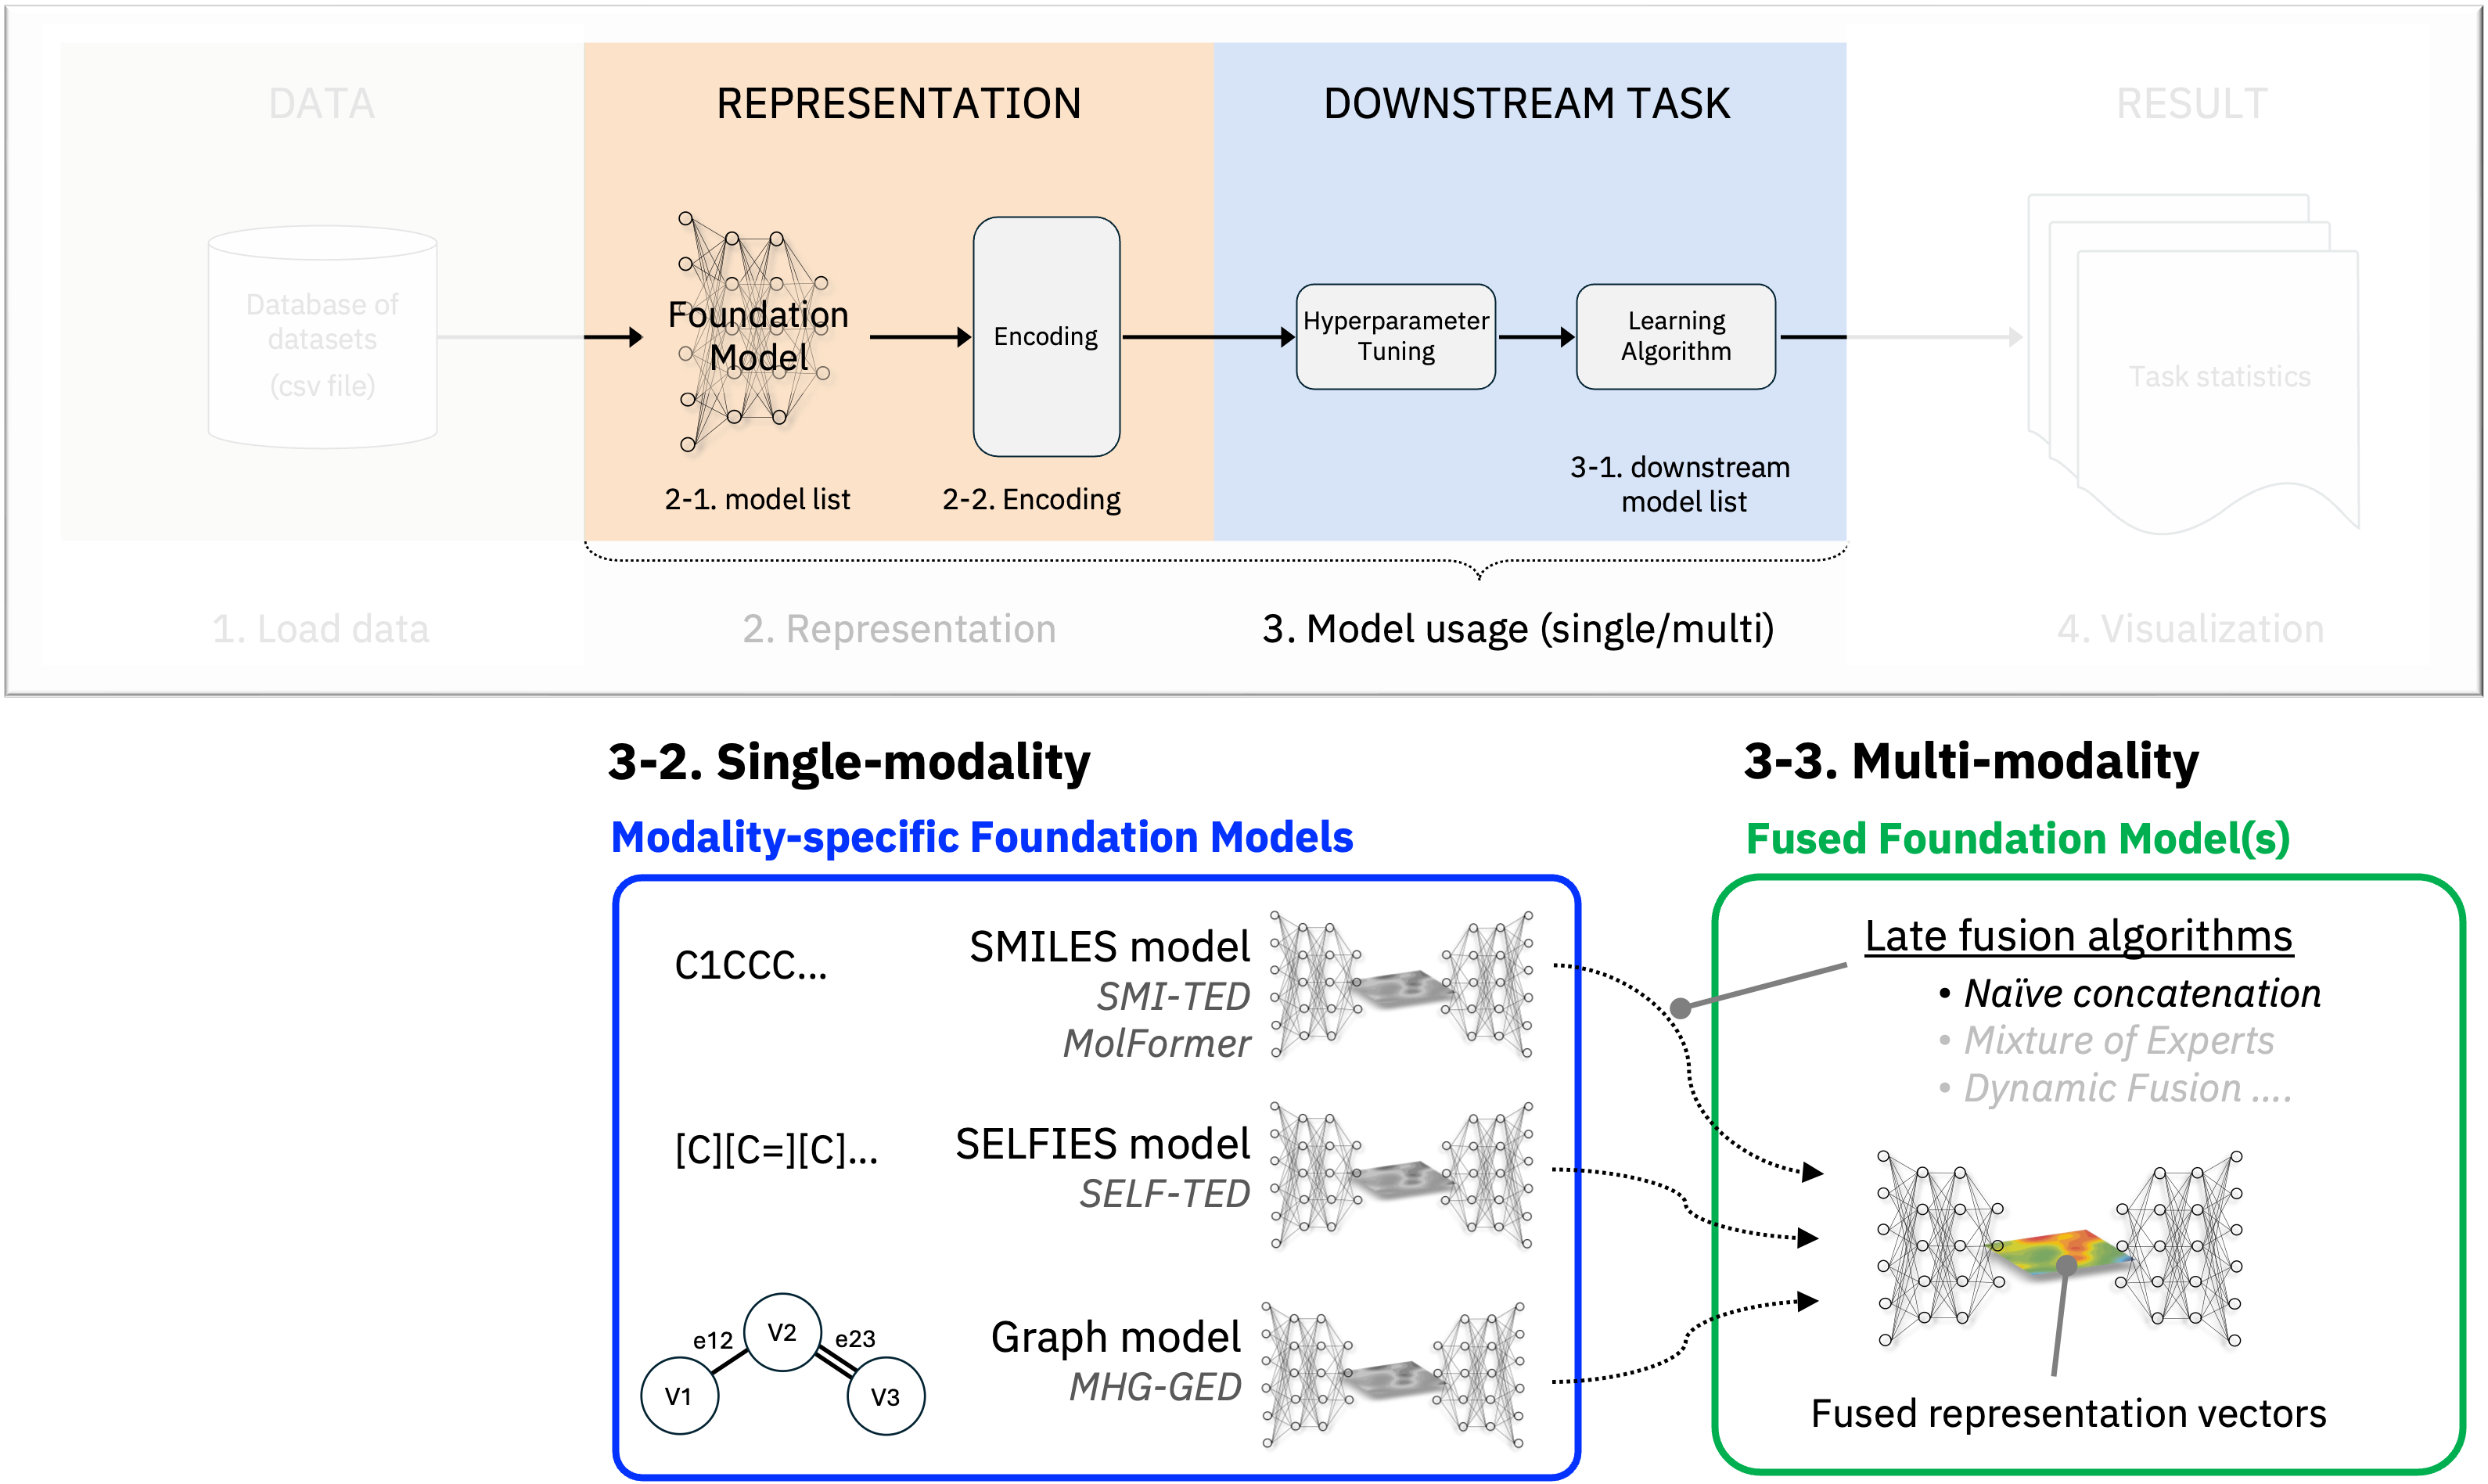

### 3-1. List of Downstream Models

In [10]:
fm4m.avail_downstream_models()

,Name,Task Type
0,XGBClassifier,Classfication
1,DefaultClassifier,Classfication
2,SVR,Regression
3,Kernel Ridge,Regression
4,Linear Regression,Regression
5,DefaultRegressor,Regression


### 3-2. Example of single-modal model usage

In [28]:
result = fm4m.single_modal(model="MHG-GED", x_train=xtrain, y_train=ytrain, x_test=xtest, y_test=ytest, downstream_model="DefaultClassifier")

MHG-GED


/content/materials/models/mhg_model/load.py:84: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_dict = torch.load(f)


 Calculating ROC AUC Score ...
ROC-AUC Score: 0.8714
Generating latent plots
Generating latent plots : Done


In [ ]:
print(f"result[0]: Result, '{result[0]}', {type(result[0])}")
print(f"result[1]: Row score, {result[1]}, {type(result[1])}")
print(f"result[2]: False Positive Rate, type {type(result[2])}")
print(f"result[3]: True Positive Rate, type {type(result[3])}")
print(f"result[4]: Class_0 latent space, type {type(result[4])}")
print(f"result[5]: Class_1 latent space, type {type(result[5])}")

result[0]: Result, 'ROC-AUC Score: 0.8604', <class 'str'>
result[1]: Row score, 0.8604181951577403, <class 'numpy.float64'>
result[2]: False Positive Rate, type <class 'numpy.ndarray'>
result[3]: True Positive Rate, type <class 'numpy.ndarray'>
result[4]: Class_0 latent space, type <class 'numpy.ndarray'>
result[5]: Class_1 latent space, type <class 'numpy.ndarray'>


### 3-3. Example of multi-modal model usage

In [ ]:
result = fm4m.multi_modal(model_list=["MHG-GED","SMI-TED"], x_train=xtrain, y_train=ytrain, x_test=xtest, y_test=ytest, downstream_model="DefaultClassifier")

/content/materials/models/mhg_model/load.py:84: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_dict = torch.load(f)
/usr/local/lib/python3.10/dist-packages/transformers

Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)
100%|██████████| 1/1 [00:06<00:00,  6.52s/it]


Representations loaded successfully
Generating latent plots
Generating latent plots : Done
 Calculating ROC AUC Score ...
ROC-AUC Score: 0.8753
ROC-AUC Score: 0.8753


In [ ]:
result[0]

'ROC-AUC Score: 0.8753'

## 4. Visualization
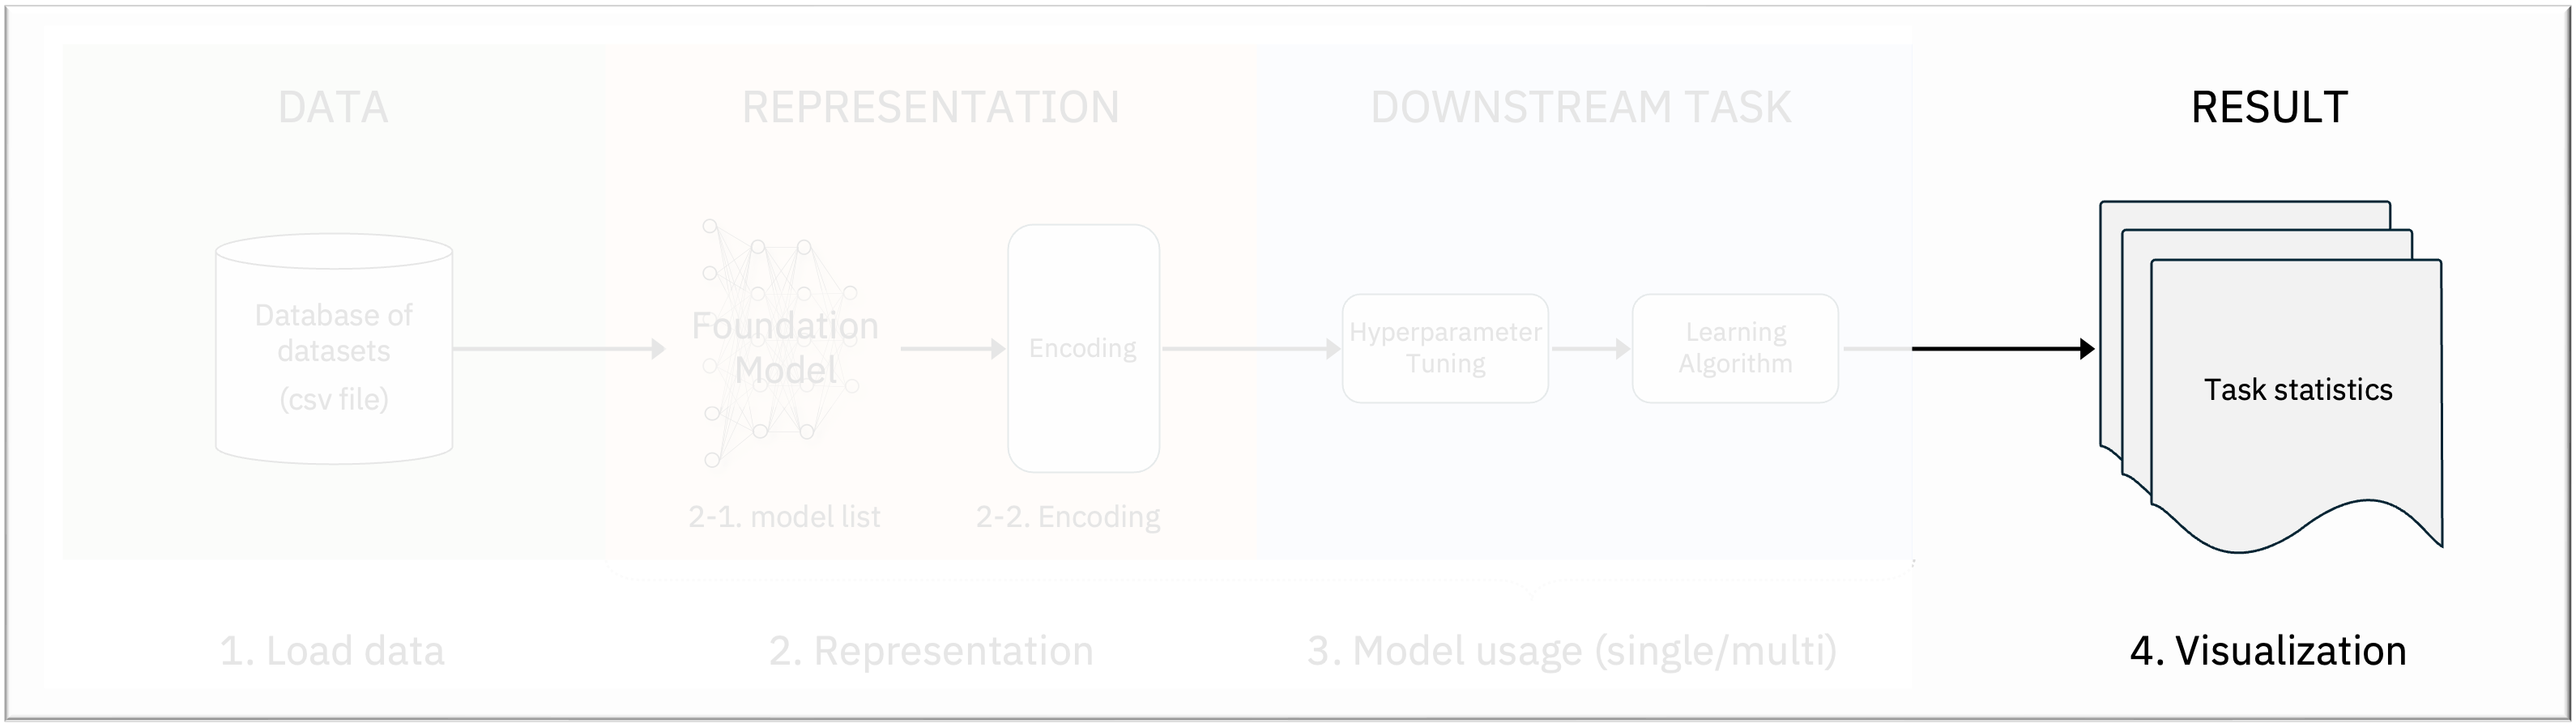

### 4-1. ROC-AUC: Classification task

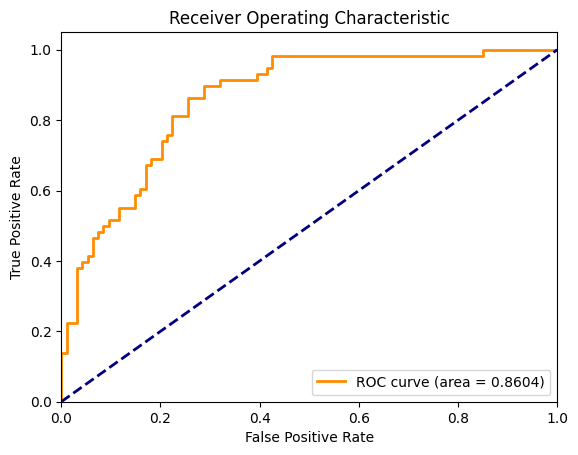

In [ ]:
fig, ax = plt.subplots()
ax.set_title("ROC-AUC Curve")
ax.plot(result[2], result[3], color='darkorange', lw=2, label=f'ROC curve (area = {result[1]:.4f})')
ax.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic')
ax.legend(loc='lower right')



### 4-2. Latent space: Classification task

Text(0.5, 1.0, 'Dataset Distribution')

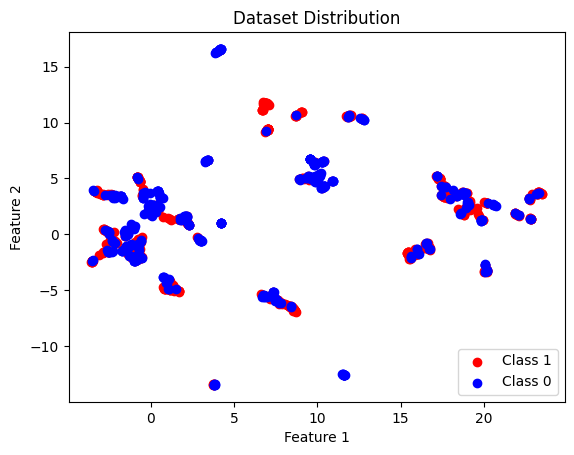

In [ ]:
fig, ax = plt.subplots()
ax.set_title("T-SNE Plot")

class_0 = result[4]
class_1 = result[5]

plt.scatter(class_1[:, 0], class_1[:, 1], c='red', label='Class 1')
plt.scatter(class_0[:, 0], class_0[:, 1], c='blue', label='Class 0')

ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.legend(loc='lower right')

ax.set_title('Dataset Distribution')

### 4-3. Parity Plot: Regression task

In [11]:
train_df  = pd.read_csv(f"../data/esol/train.csv")
test_df  = pd.read_csv(f"../data/esol/test.csv")

In [12]:
train_df.head(2)

,Unnamed: 0,selfies,prop,smiles
0,0,[O] [C] [C] [O] [C] [Branch2] [Ring2] [Ring1] ...,-0.974,OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)...
1,1,[C] [C] [O] [C] [=C] [C] [=Ring1] [Branch1] [C...,-2.885,Cc1occc1C(=O)Nc2ccccc2


In [13]:
input = "smiles"
output = "prop"

xtrain = list(train_df[input].values)
ytrain = list(train_df[output].values)

xtest = list(test_df[input].values)
ytest = list(test_df[output].values)

In [17]:
# can set hyper parameter for downstream-model
params = {'kernel': 'rbf', 'C': 2.0}
result = fm4m.single_modal(model="MHG-GED", x_train=xtrain, y_train=ytrain, x_test=xtest, y_test=ytest, downstream_model="SVR", params=params)

MHG-GED


/content/materials/models/mhg_model/load.py:84: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_dict = torch.load(f)


 Calculating ROC AUC Score ...
RMSE Score: 0.5289
Generating latent plots
Generating latent plots : Done


In [ ]:
print(f"result[0]: Result, '{result[0]}', {type(result[0])}")
print(f"result[1]: Row score, {result[1]}, {type(result[1])}")
print(f"result[2]: Actual property values, type {type(result[2])}")
print(f"result[3]: Predicted property values, type {type(result[3])}")
print(f"result[4] & result[5]: latent space, shape {np.concatenate([result[4], result[5]]).shape}")

result[0]: Result, 'RMSE Score: 0.5289', <class 'str'>
result[1]: Row score, 0.5289183453984735, <class 'numpy.float64'>
result[2]: Actual property values, type <class 'list'>
result[3]: Predicted property values, type <class 'numpy.ndarray'>
result[4] & result[5]: latent space, shape (1708, 2)


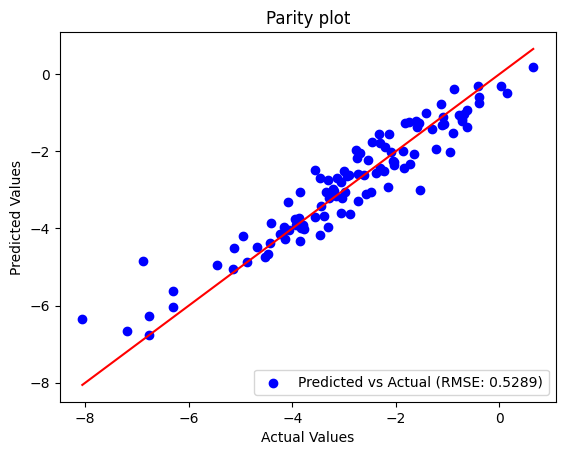

In [ ]:
fig, ax = plt.subplots()
ax.set_title("Parity plot")
y_batch_test = np.array(result[2], dtype=float)
y_prob = np.array(result[3], dtype=float)
ax.scatter(y_batch_test, y_prob, color="blue", label=f"Predicted vs Actual (RMSE: {result[1]:.4f})")
min_val = min(min(y_batch_test), min(y_prob))
max_val = max(max(y_batch_test), max(y_prob))
ax.plot([min_val, max_val], [min_val, max_val], 'r-')

ax.set_xlabel('Actual Values')
ax.set_ylabel('Predicted Values')
ax.legend(loc='lower right')